# **Implement a Recursive Algorithm**
MSDS 432 Module 3

Nameyeh Alam

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
import time

### 1. Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).

In [2]:
np.random.seed(1)
array = np.random.randint(low=100, high=500, size=10).tolist()

array = list(map(int, array))

### 2. Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary. 

In this section, we first define the factorial function that performs the calculation iteratively, or with a for loop. Because we don't want to individually calculate factorials for the all the numbers in the array, we will use a for loop outside of the iterative factorial function. Before running the array numbers through the function, we will create empty lists to store the outputs for each number; one list for the factorial output, and one list for the execution time. 

In [3]:
def fact_iter(x):
    ans = 1
    for i in range(1,x+1): 
        ans = ans * i 
    return ans

In [4]:
array_loop = []
array_loop_time = []
for n in array:
    import time
    start = time.perf_counter()
    y = fact_iter(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
#     print("Recursion time =  %s seconds" % (end - start))
    array_loop.append(y)
    array_loop_time.append(time)
array_loop
array_loop_time

[0.12751500000085514,
 0.3844849999996569,
 1.2358809999994946,
 0.16630299999853548,
 0.40339400000100056,
 0.706909999999894,
 0.3447269999998781,
 0.2715159999997496,
 0.4610920000001073,
 0.2923639999998784]

### 3. Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.

In this section, we again define the factorial function first; this time the factorial will be calculated recursively instead of with a for loop. Similar to the last section, we will use a for loop outside of the recursive factorial function to efficiently get our results. Again, empty lists are created to store the factorial output and the execution time for each number. 

In [5]:
# base code for recursion 
# as described in Chapter 3 of Grokking Algorithms (Bhargava 2016)
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

In [6]:
array_recur = []
array_recur_time = []
for n in array:
    import time
    start = time.perf_counter()
    y = fact(n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
#     print("Recursion time =  %s seconds" % (end - start))
    array_recur.append(y)
    array_recur_time.append(time)
array_recur
array_recur_time

[0.264726999999354,
 1.7386699999999422,
 2.2172170000001046,
 0.33018200000078934,
 0.9231539999987604,
 1.8400039999999507,
 0.5735770000008245,
 0.3626679999992888,
 1.0201240000000666,
 0.43297099999861643]

### 4. Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.

We should have sorted the initial array after generating it, but instead of rerunning all the code, after organizing the results in the dataframe, the dataframe was sorted by number. In the future, we should adhere to best practices and sort in the beginning before moving forward. 

In [7]:
df=pd.DataFrame({'number':array,'factorial':array_loop,'recur_time':array_recur_time,'loop_time':array_loop_time})
df['time_diff']=df['recur_time']-df['loop_time']
df=df.sort_values(by='number')
df

,number,factorial,recur_time,loop_time,time_diff
0,137,5012888748274991661034926292112253883237205694...,0.264727,0.127515,0.137212
3,172,2134551080774388656290725701457338867300561593...,0.330182,0.166303,0.163879
7,233,9688098312403563764462819142711903273341070576...,0.362668,0.271516,0.091152
9,244,1406686158591095782582355424847327315104888551...,0.432971,0.292364,0.140607
6,303,8429835712576162669156835438871826823450494341...,0.573577,0.344727,0.228850
1,335,1156323337476057938975353804080109126849124676...,1.738670,0.384485,1.354185
4,355,6773767977667418360999114574273791421754222965...,0.923154,0.403394,0.519760
8,435,3492568302586660806842386856444503662583831103...,1.020124,0.461092,0.559032
5,493,1629065060950699000257933439287168591766043386...,1.840004,0.706910,1.133094
2,496,1975842185597201155604039420988101025292970922...,2.217217,1.235881,0.981336


### 5. Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.

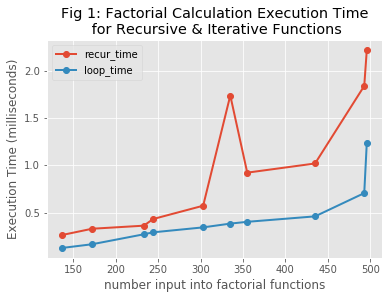

In [8]:
plt.style.use('ggplot')
# sns.set_context('poster')

plt.plot( 'number', 'recur_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'number', 'loop_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('number input into factorial functions')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Fig 1: Factorial Calculation Execution Time\n for Recursive & Iterative Functions')
plt.legend()
plt.show()
plt.close()

# Executive Summary

In this assignment, we implemented a recursive algorithm to calculate the factorial of a number, and compared it to another function which calculated the factorial iteratively. We first defined the two functions, naming the recursive function "fact" and the iterative function "fact_iter". Next we created empty lists to store the output of the factorial function, and to store the time it took to calculate the factorial, for each of the two factorial functions. To calculate the execution time for each function, we implemented a for loop so each number in the original array could be looped through. NOTE: This for loop was only implemented to calculate execution times, and is separate from the function "fact_iter" which uses a for loop to calculate the factorial. 

We then organized the factorials and the associated execution times in a pandas DataFrame for both the recursive function and the iterative function. We also added a column for the time difference between the two functions. Next, we generated a graph, shown in Figure 1, with the number from the array on the horizontal axis and the execution time in milliseconds on the vertical axis, for both functions.  

Figure 1 clearly shows that the iterative function performed faster than the recursive function, which is what we expected since the recursive function utilizes more memory during execution. The execution times for the iterative function increases as the numbers get larger, but for the recursive function, although the execution time does increase overall as the numbers get larger, there is some inconsistency in the middle of the graph, which could be due to overhead, or other processes running on the machine while the algorithm was running. The execution times also start out closer together for the two functions, and diverge more as the numbers get larger. 